Loading all datasets for the final training and evaluation...

Training the RandomForestClassifier model...
Model training complete.

Saving the trained model to 'flood_model.pkl'...
Model saved successfully.

Evaluating the model on the unseen test set...

Classification Report:
              precision    recall  f1-score   support

     Extreme       0.96      0.77      0.85        60
         Low       1.00      0.96      0.98        23
    Moderate       0.80      0.95      0.87        39
      Severe       0.81      0.87      0.84        78

    accuracy                           0.86       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.88      0.86      0.87       200


Confusion Matrix:


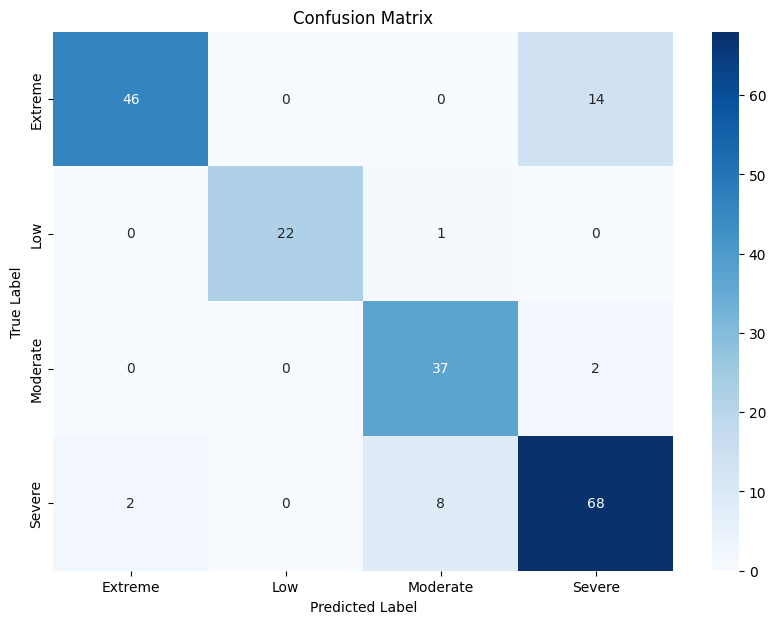

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# --- 1. Load All Necessary Data ---
print("Loading all datasets for the final training and evaluation...")
X_train_balanced = pd.read_csv('X_train_balanced.csv')
y_train_balanced = pd.read_csv('y_train_balanced.csv').squeeze()
X_test_processed = pd.read_csv('X_test_processed.csv')
y_test = pd.read_csv('y_test.csv').squeeze()

# --- 2. Initialize and Train the Model ---
print("\nTraining the RandomForestClassifier model...")
# Initialize the model with good default parameters and a random_state for reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the balanced training data
model.fit(X_train_balanced, y_train_balanced)
print("Model training complete.")

# --- 3. Save the Trained Model ---
print("\nSaving the trained model to 'flood_model.pkl'...")
with open('flood_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved successfully.")

# --- 4. Evaluate the Model on the Test Set ---
print("\nEvaluating the model on the unseen test set...")
# Make predictions on the test data
y_pred = model.predict(X_test_processed)

# --- 5. Display Performance Metrics ---
print("\nClassification Report:")
# The classification report shows precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
# The confusion matrix shows how many predictions were correct and where the errors occurred
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()